In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # Disable the warning
from scipy.stats import norm
import matplotlib.ticker as ticker
import glob
import os
from matplotlib import rcParams
from cycler import cycler
import matplotlib.cm as cm
# Set Dark2 as the default color cycle
dark2 = cm.get_cmap('Dark2').colors
plt.rcParams['axes.prop_cycle'] = cycler(color=dark2)
from matplotlib.ticker import ScalarFormatter
%matplotlib widget

/var/folders/cf/0fb79lcx5z9by5185swm__x00000gr/T/ipykernel_56916/929737011.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  dark2 = cm.get_cmap('Dark2').colors


In [31]:
def CalcMassCylinder(det_size, thick):
    rho_Cu   = 8960 # kg/m^3
    return np.pi*0.25*rho_Cu * ( (det_size+2*thick)**3 - det_size**3 )

In [32]:
# Load in all CSV for total performance

# Path to your directory
path = "../data/TrackRecoCuts/"

# Get all CSV files in the directory
all_files = glob.glob(os.path.join(path, "*.csv"))

# Load and concatenate
df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

display(df)



,Pressure,Diffusion,cut,nubb_gen,nubb_cut,nubb_eff,Bkg_gen,Bkg_cut,Bkg_eff,Bi_gen,Bi_cut,Bi_eff,Tl_gen,Tl_cut,Tl_eff,single_gen,single_cut,single_eff
0,10,nodiff,nat,194831,55093.34,0.246580,754376,1483,0.001966,359333,376,0.001046,207655,50,0.000241,187597,1057,0.005634
1,1,0.25percent,enr,192291,87221.76,0.241311,595884,7280,0.012217,200290,2501,0.012487,195119,630,0.003229,200513,4149,0.020692
2,5,0.05percent,next1t,195130,65545.06,0.248569,730594,11047,0.015121,309515,3413,0.011027,237926,498,0.002093,183459,7136,0.038897
3,5,nodiff,next1t,195171,65265.44,0.247457,731706,4215,0.005761,310356,786,0.002533,238261,118,0.000495,183397,3311,0.018054
4,5,5percent,enr,195171,64638.14,0.245079,731701,3421,0.004675,310281,883,0.002846,238263,131,0.000550,183465,2407,0.013120
5,15,nodiff,nat,195246,53331.98,0.245291,791269,1404,0.001774,381848,387,0.001013,220980,46,0.000208,189534,971,0.005123
6,10,5percent,enr,194831,59058.04,0.244318,754896,3182,0.004215,359595,814,0.002264,207799,84,0.000404,187711,2284,0.012168
7,25,5percent,next1t,191502,54384.86,0.248776,794803,2664,0.003352,396482,378,0.000953,212357,44,0.000207,187784,2242,0.011939
8,1,5percent,enr,192287,87878.58,0.243133,599388,8841,0.014750,203897,2559,0.012550,195183,649,0.003325,200347,5633,0.028116
9,15,nodiff,next1t,195246,58239.68,0.249071,791269,3120,0.003943,381848,636,0.001666,220980,68,0.000308,189534,2416,0.012747


0.264 0.072


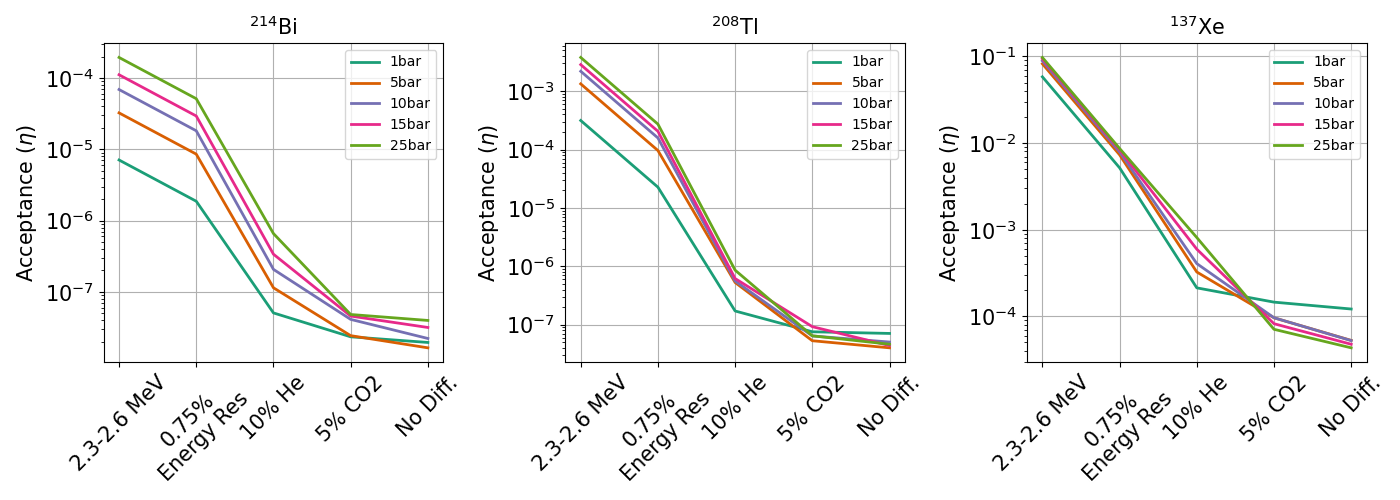

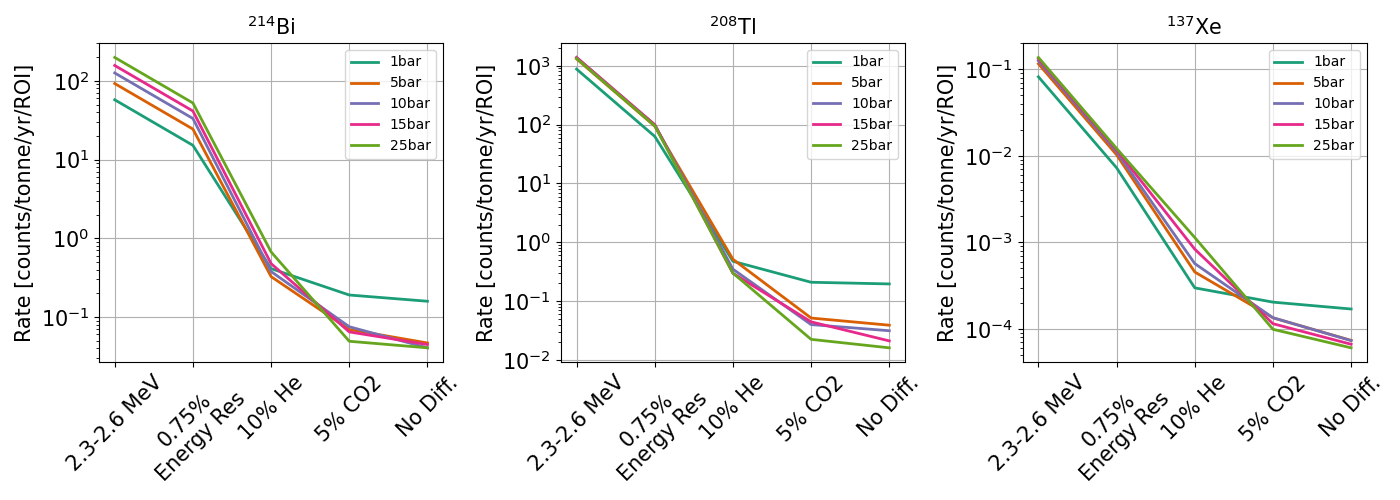

In [52]:
mode = "enr"
# mode = "nat"


Detsize = np.array([6.182, 3.615, 2.870, 2.507, 2.114])
MCu_12cm_Enr = CalcMassCylinder(Detsize, 12e-2)
Int_Win_Bi_12cm_Enr = np.array([708, 3241, 6891, 11105, 19419])/1e8
Int_Win_Tl_12cm_Enr = np.array([3153, 13391, 22002, 28604, 37958]) /1e7
Int_Win_single_Enr = np.array([5827, 8232, 8892, 9393, 9747])/100000

Detsize = np.array([13.319, 7.789, 6.182, 5.301, 4.556])
MCu_12cm_Nat = CalcMassCylinder(Detsize, 12e-2)
Int_Win_Bi_12cm_Nat = np.array([708, 3241, 6891, 11105, 19419])/1e8
Int_Win_Tl_12cm_Nat = np.array([9562, 29985, 42677, 49219, 57306])/10000000 
Int_Win_single_Nat = np.array([7703, 9251, 9532, 9783, 10146])/100000

if mode == "enr":
    Int_Win_Bi_12cm = Int_Win_Bi_12cm_Enr
    Int_Win_Tl_12cm = Int_Win_Tl_12cm_Enr
    Int_Win_single = Int_Win_single_Enr
    MCu_12cm = MCu_12cm_Enr
elif mode == "nat":
    Int_Win_Bi_12cm = Int_Win_Bi_12cm_Nat
    Int_Win_Tl_12cm = Int_Win_Tl_12cm_Nat
    Int_Win_single = Int_Win_single_Nat
    MCu_12cm = MCu_12cm_Nat

else:
    print("Unknown mode")



temp_df = df[ (df.cut == mode) & (df.Diffusion == "nodiff") ].sort_values(by="Pressure")
Bkg_rej_Bi_nodiff = temp_df.Bi_eff.values
Bkg_rej_Tl_nodiff = temp_df.Tl_eff.values
Bkg_rej_single_nodiff = temp_df.single_eff.values

temp_df = df[ (df.cut == mode) & (df.Diffusion == "5percent") ].sort_values(by="Pressure")
Bkg_rej_Bi_5p = temp_df.Bi_eff.values
Bkg_rej_Tl_5p = temp_df.Tl_eff.values
Bkg_rej_single_5p = temp_df.single_eff.values

temp_df = df[ (df.cut == mode) & (df.Diffusion == "0.05percent") ].sort_values(by="Pressure")
Bkg_rej_Bi_He = temp_df.Bi_eff.values
Bkg_rej_Tl_He = temp_df.Tl_eff.values
Bkg_rej_single_He = temp_df.single_eff.values



# 0.5% assymetric cut
Bi_ER2 = 0.12 
Tl_ER2 = 0.048

Bi_ER = 0.264
Tl_ER =  0.072
single_ER = 0.089
print(Bi_ER, Tl_ER)


# Acceptance
fig = plt.figure(figsize=(14,5));

cut_stage_label = ["2.3-2.6 MeV", "0.75%\nEnergy Res", "10% He", "5% CO2", "No Diff."]
pressures_label = ["1", "5", "10", "15", "25"]
pressures = [1, 5, 10, 15, 25]

plt.subplot(131);

for index, p in enumerate(pressures):
    initial_rate =(Int_Win_Bi_12cm[index]) 
    cut_stages = [initial_rate, initial_rate*Bi_ER, initial_rate*Bi_ER*Bkg_rej_Bi_He[index], initial_rate*Bi_ER*Bkg_rej_Bi_5p[index], initial_rate*Bi_ER*Bkg_rej_Bi_nodiff[index]]
    plt.plot(cut_stage_label, cut_stages, linewidth = 2, label = f"{pressures_label[index]}bar")

# Here lets plot the NEXT-1t analysis 
# initial_rate =(Int_Win_Bi_12cm[3] /1e8) 
# plt.plot(cut_stage_label, [initial_rate, initial_rate*Bi_ER2, initial_rate*Bi_ER2*2e-3], linewidth = 2, label = f"{pressures_label[3]}bar (NEXT1t)", c = "darkred", linestyle = "--") 

# plt.xlabel("Cut Stage", fontsize=15)
plt.ylabel(r"Acceptance ($\eta$)", fontsize=15)
plt.tick_params(axis='both', which='both', labelsize=15)
plt.legend()
plt.semilogy()
plt.grid()
plt.xticks(rotation=45) 
plt.title("$^{214}$Bi",fontsize=15)
# plt.axhline(y=1.2e-8, color='Teal', linestyle='--', linewidth=2)
plt.tight_layout()

plt.subplot(132);
for index, p in enumerate(pressures):
    initial_rate = (Int_Win_Tl_12cm[index]) 
    cut_stages = [initial_rate, initial_rate*Tl_ER, initial_rate*Tl_ER*Bkg_rej_Tl_He[index], initial_rate*Tl_ER*Bkg_rej_Tl_5p[index], initial_rate*Tl_ER*Bkg_rej_Tl_nodiff[index]]
    plt.plot(cut_stage_label, cut_stages, linewidth = 2, label = f"{pressures_label[index]}bar")

# Here lets plot the NEXT-1t analysis 
# initial_rate =(Int_Win_Tl_12cm[3] /1e8) 
# plt.plot(cut_stage_label, [initial_rate, initial_rate*Tl_ER2, initial_rate*Tl_ER2*500e-6], linewidth = 2, label = f"{pressures_label[3]}bar (NEXT1t)", c = "darkred", linestyle = "--") 

# plt.xlabel("Cut Stage", fontsize=15)
plt.ylabel(r"Acceptance ($\eta$)", fontsize=15)
plt.tick_params(axis='both', which='both', labelsize=15)
plt.legend()
plt.semilogy()
plt.grid()
# plt.ylim(5e-4, 2000)
plt.title("$^{208}$Tl",fontsize=15)
plt.xticks(rotation=45) 
# plt.axhline(y=4.5e-8, color='Orange', linestyle='--', linewidth=2)
plt.tight_layout()


plt.subplot(133);
for index, p in enumerate(pressures):
    initial_rate = (Int_Win_single[index]) 
    cut_stages = [initial_rate, initial_rate*single_ER, initial_rate*single_ER*Bkg_rej_single_He[index], initial_rate*single_ER*Bkg_rej_single_5p[index], initial_rate*single_ER*Bkg_rej_single_nodiff[index]]
    plt.plot(cut_stage_label, cut_stages, linewidth = 2, label = f"{pressures_label[index]}bar")

# Here lets plot the NEXT-1t analysis 
# initial_rate =(Int_Win_Tl_12cm[3] /1e8) 
# plt.plot(cut_stage_label, [initial_rate, initial_rate*Tl_ER2, initial_rate*Tl_ER2*500e-6], linewidth = 2, label = f"{pressures_label[3]}bar (NEXT1t)", c = "darkred", linestyle = "--") 

# plt.xlabel("Cut Stage", fontsize=15)
plt.ylabel(r"Acceptance ($\eta$)", fontsize=15)
plt.tick_params(axis='both', which='both', labelsize=15)
plt.legend()
plt.semilogy()
plt.grid()
# plt.ylim(5e-4, 2000)
plt.title("$^{137}$Xe",fontsize=15)
# plt.axhline(y=5.68e-5, color='Orange', linestyle='--', linewidth=2)
plt.xticks(rotation=45) 
plt.tight_layout()

plt.savefig(f"../../../Projects/Atmospheric TPC/PaperDraft/AcceptancePressure_{mode}.pdf")

# ---------------------------------------------------------------------------------------------------------------------------------
# Rates

fig = plt.figure(figsize=(14,5));

cut_stage_label = ["2.3-2.6 MeV", "0.75%\nEnergy Res", "10% He", "5% CO2", "No Diff."]
pressures_label = ["1", "5", "10", "15", "25"]
pressures = [1, 5, 10, 15, 25]

plt.subplot(131);

for index, p in enumerate(pressures):
    initial_rate = 1.28e-6 * (Int_Win_Bi_12cm[index]) * 3.15e7 *  MCu_12cm[index]
    cut_stages = [initial_rate, initial_rate*Bi_ER, initial_rate*Bi_ER*Bkg_rej_Bi_He[index], initial_rate*Bi_ER*Bkg_rej_Bi_5p[index], initial_rate*Bi_ER*Bkg_rej_Bi_nodiff[index]]
    plt.plot(cut_stage_label, cut_stages, linewidth = 2, label = f"{pressures_label[index]}bar")

# Here lets plot the NEXT-1t analysis 
# initial_rate = 1.28e-6 * (Int_Win_Bi_12cm[3] /1e8) * 3.15e7 *  MCu_12cm[3]
# plt.plot(cut_stage_label, [initial_rate, initial_rate*Bi_ER2, initial_rate*Bi_ER2*2e-3], linewidth = 2, label = f"{pressures_label[3]}bar (NEXT1t)", c = "darkred", linestyle = "--") 

# plt.xlabel("Cut Stage", fontsize=15)
plt.ylabel("Rate [counts/tonne/yr/ROI]", fontsize=15)
plt.tick_params(axis='both', which='both', labelsize=15)
plt.legend()
plt.semilogy()
plt.grid()
# plt.ylim(5e-4, 200)
# plt.axhline(y=3.5e-2, color='Teal', linestyle='--', linewidth=2)
plt.title("$^{214}$Bi",fontsize=15)
plt.xticks(rotation=45) 
plt.tight_layout()



plt.subplot(132);
for index, p in enumerate(pressures):
    initial_rate = 35.94e-2 * 1.22e-6 * (Int_Win_Tl_12cm[index]) * 3.15e7 *  MCu_12cm[index]
    cut_stages = [initial_rate, initial_rate*Tl_ER, initial_rate*Tl_ER*Bkg_rej_Tl_He[index], initial_rate*Tl_ER*Bkg_rej_Tl_5p[index], initial_rate*Tl_ER*Bkg_rej_Tl_nodiff[index]]
    plt.plot(cut_stage_label, cut_stages, linewidth = 2, label = f"{pressures_label[index]}bar")

# Here lets plot the NEXT-1t analysis 
initial_rate = 35.94e-2 * 1.22e-6 * (Int_Win_Tl_12cm[3] /1e7) * 3.15e7 *  MCu_12cm[3]
# plt.plot(cut_stage_label, [initial_rate, initial_rate*Tl_ER2, initial_rate*Tl_ER2*500e-6], linewidth = 2, label = f"{pressures_label[3]}bar (NEXT1t)", c = "darkred", linestyle = "--") 

# plt.xlabel("Cut Stage", fontsize=15)
plt.ylabel("Rate [counts/tonne/yr/ROI]", fontsize=15)
plt.tick_params(axis='both', which='both', labelsize=15)
plt.legend()
plt.semilogy()
plt.grid()
# plt.ylim(5e-4, 2000)
plt.title("$^{208}$Tl",fontsize=15)
plt.tight_layout()
# plt.axhline(y=3.5e-2, color='Orange', linestyle='--', linewidth=2)
plt.xticks(rotation=45) 
plt.tight_layout()


plt.subplot(133);
for index, p in enumerate(pressures):
    initial_rate = (Int_Win_single[index]) * 1.4
    cut_stages = [initial_rate, initial_rate*single_ER, initial_rate*single_ER*Bkg_rej_single_He[index], initial_rate*single_ER*Bkg_rej_single_5p[index], initial_rate*single_ER*Bkg_rej_single_nodiff[index]]
    plt.plot(cut_stage_label, cut_stages, linewidth = 2, label = f"{pressures_label[index]}bar")

# plt.xlabel("Cut Stage", fontsize=15)
plt.ylabel("Rate [counts/tonne/yr/ROI]", fontsize=15)
plt.tick_params(axis='both', which='both', labelsize=15)
plt.legend()
plt.semilogy()
plt.grid()
# plt.ylim(5e-4, 2000)
plt.title("$^{137}$Xe",fontsize=15)
# plt.axhline(y=3.5e-2, color='Orange', linestyle='--', linewidth=2)
plt.xticks(rotation=45) 
plt.tight_layout()


plt.savefig(f"../../../Projects/Atmospheric TPC/PaperDraft/PerformancePressure_{mode}.pdf")

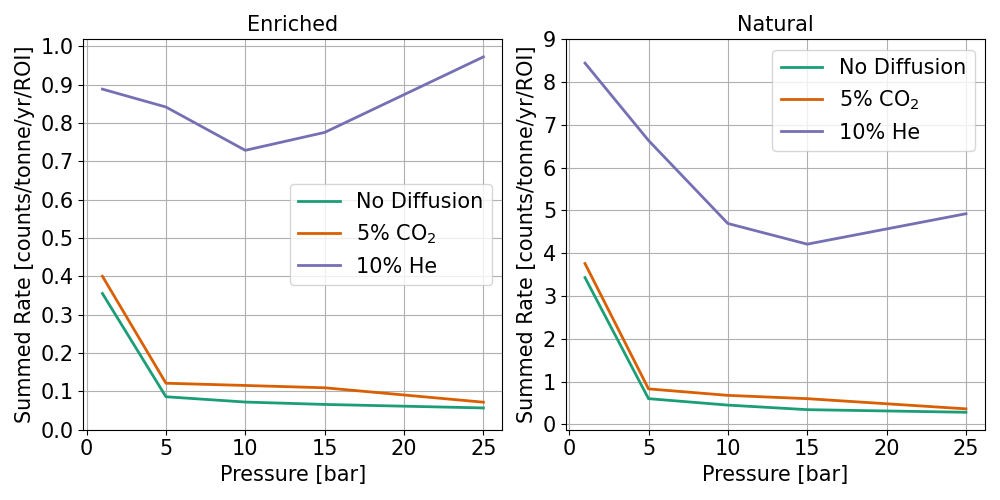

In [53]:
# Make a summary plot of the total rates



seconds_per_year = 3.15e7

initial_rate_Bi_Enr = 1.28e-6 * Int_Win_Bi_12cm_Enr * seconds_per_year * MCu_12cm_Enr
initial_rate_Tl_Enr = 35.94e-2 * 1.22e-6 * Int_Win_Tl_12cm_Enr * seconds_per_year * MCu_12cm_Enr
initial_rate_single_Enr = Int_Win_single_Enr * 1.4

initial_rate_Bi_Nat = 1.28e-6 * Int_Win_Bi_12cm_Nat * seconds_per_year * MCu_12cm_Nat
initial_rate_Tl_Nat = 35.94e-2 * 1.22e-6 * Int_Win_Tl_12cm_Nat * seconds_per_year * MCu_12cm_Nat
initial_rate_single_Nat = Int_Win_single_Nat * 1.4

# print(initial_rate_Bi_Enr*Bi_ER*Bkg_rej_Bi_nodiff)
# print(initial_rate_Tl_Enr*Tl_ER*Bkg_rej_Tl_nodiff)
# print(initial_rate_Bi_Enr*Bi_ER*Bkg_rej_Bi_nodiff + initial_rate_Tl_Enr*Tl_ER*Bkg_rej_Tl_nodiff + initial_rate_single_Enr*single_ER*Bkg_rej_single_nodiff)

# cut_stages = [initial_rate*Bi_ER*Bkg_rej_Bi_5p[index]]

fig = plt.figure(figsize=(10,5));

plt.subplot(121);
plt.plot(pressures, initial_rate_Bi_Enr*Bi_ER*Bkg_rej_Bi_nodiff + initial_rate_Tl_Enr*Tl_ER*Bkg_rej_Tl_nodiff + initial_rate_single_Enr*single_ER*Bkg_rej_single_nodiff, linewidth = 2, label = f"No Diffusion")
plt.plot(pressures, initial_rate_Bi_Enr*Bi_ER*Bkg_rej_Bi_5p     + initial_rate_Tl_Enr*Tl_ER*Bkg_rej_Tl_5p     + initial_rate_single_Enr*single_ER*Bkg_rej_single_5p,     linewidth = 2, label = f"5% CO$_2$")
plt.plot(pressures, initial_rate_Bi_Enr*Bi_ER*Bkg_rej_Bi_He     + initial_rate_Tl_Enr*Tl_ER*Bkg_rej_Tl_He     + initial_rate_single_Enr*single_ER*Bkg_rej_single_He,     linewidth = 2, label = f"10% He")
plt.xlabel("Pressure [bar]", fontsize=15)
plt.ylabel("Summed Rate [counts/tonne/yr/ROI]", fontsize=15)
plt.tick_params(axis='both', which='both', labelsize=15)
plt.legend(fontsize=15)
plt.grid()
plt.title("Enriched",fontsize=15)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.tight_layout()

plt.subplot(122);
plt.plot(pressures, initial_rate_Bi_Nat*Bi_ER*Bkg_rej_Bi_nodiff + initial_rate_Tl_Nat*Tl_ER*Bkg_rej_Tl_nodiff + initial_rate_single_Nat*single_ER*Bkg_rej_single_nodiff, linewidth = 2, label = f"No Diffusion")
plt.plot(pressures, initial_rate_Bi_Nat*Bi_ER*Bkg_rej_Bi_5p + initial_rate_Tl_Nat*Tl_ER*Bkg_rej_Tl_5p + initial_rate_single_Nat*single_ER*Bkg_rej_single_5p, linewidth = 2, label = f"5% CO$_2$")
plt.plot(pressures, initial_rate_Bi_Nat*Bi_ER*Bkg_rej_Bi_He + initial_rate_Tl_Nat*Tl_ER*Bkg_rej_Tl_He + initial_rate_single_Nat*single_ER*Bkg_rej_single_He, linewidth = 2, label = f"10% He")
plt.xlabel("Pressure [bar]", fontsize=15)
plt.ylabel("Summed Rate [counts/tonne/yr/ROI]", fontsize=15)
plt.tick_params(axis='both', which='both', labelsize=15)
plt.legend(fontsize=15)
plt.grid()
plt.title("Natural",fontsize=15)
plt.yticks(np.arange(0, 10, 1))
plt.tight_layout()


plt.savefig(f"../../../Projects/Atmospheric TPC/PaperDraft/PerformanceSummary.pdf")


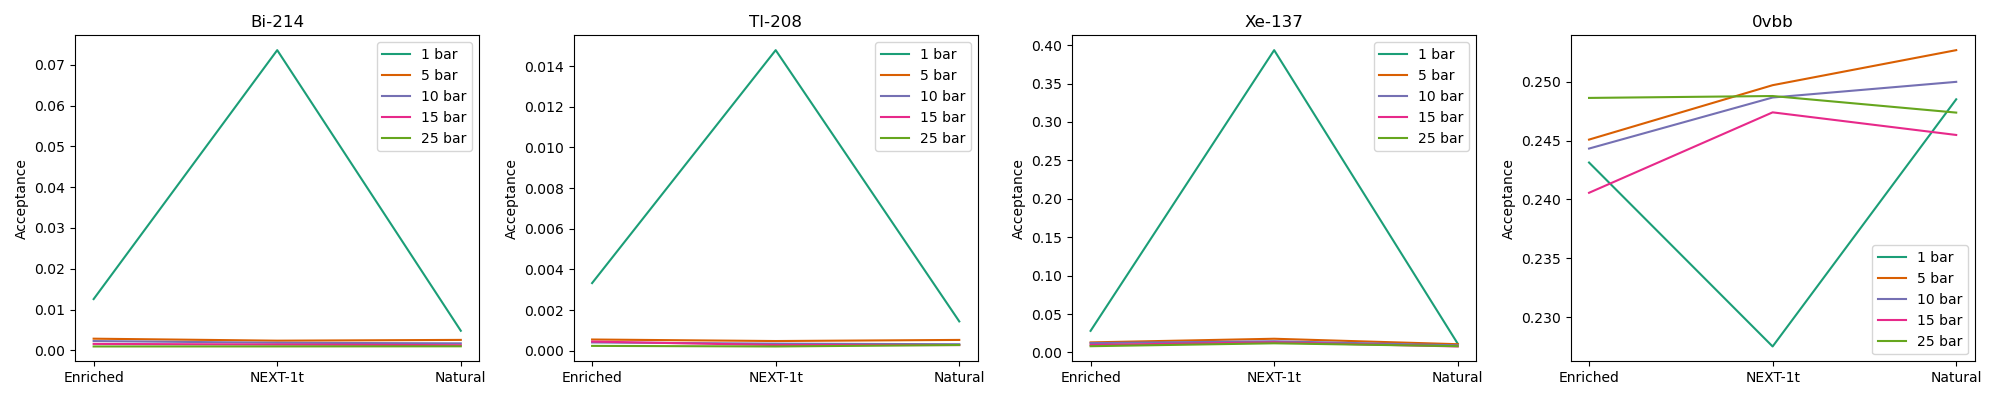

In [35]:
fig, ax = plt.subplots(1, 4, figsize=(20, 4))

pressures = [1, 5, 10, 15, 25]
modes = ["Enriched","NEXT-1t", "Natural"]
modes_sort = ["enr", "next1t", "nat"]
# diff = "0.05percent"
diff = "5percent"
# diff = "nodiff"
Backgrounds = ["Bi_eff", "Tl_eff", "single_eff", "nubb_eff"]
Titles = ["Bi-214", "Tl-208", "Xe-137", "0vbb"]

for p in pressures:

    for index, b in enumerate(Backgrounds):
        
        temp_df = df[(df.Pressure == p) & (df.Diffusion == diff)]
        temp_df["cut"] = pd.Categorical(temp_df["cut"], categories=modes_sort, ordered=True)
        temp_df= temp_df.sort_values("cut").reset_index(drop=True)
        temp_df = temp_df.reset_index(drop=True)
        # display(temp_df)
        ax[index].plot(modes, temp_df[b], label = f"{p} bar")
        ax[index].set_title(f"{Titles[index]}")
        ax[index].set_ylabel("Acceptance")

        ax[index].legend()

plt.tight_layout()


,Pressure,Diffusion,cut,nubb_gen,nubb_cut,nubb_eff,Bkg_gen,Bkg_cut,Bkg_eff,Bi_gen,Bi_cut,Bi_eff,Tl_gen,Tl_cut,Tl_eff,single_gen,single_cut,single_eff
8,1,5percent,enr,192287,87878.58,0.243133,599388,8841,0.014750,203897,2559,0.012550,195183,649,0.003325,200347,5633,0.028116
34,1,nodiff,enr,192298,88608.38,0.245139,599762,7440,0.012405,204022,2134,0.010460,195184,608,0.003115,200595,4698,0.023420
42,1,0.05percent,enr,192298,89587.46,0.247847,594825,15124,0.025426,199084,5405,0.027149,195184,1474,0.007552,200595,8245,0.041103


,Pressure,Diffusion,cut,nubb_gen,nubb_cut,nubb_eff,Bkg_gen,Bkg_cut,Bkg_eff,Bi_gen,Bi_cut,Bi_eff,Tl_gen,Tl_cut,Tl_eff,single_gen,single_cut,single_eff
8,1,5percent,enr,192287,87878.58,0.243133,599388,8841,0.014750,203897,2559,0.012550,195183,649,0.003325,200347,5633,0.028116
34,1,nodiff,enr,192298,88608.38,0.245139,599762,7440,0.012405,204022,2134,0.010460,195184,608,0.003115,200595,4698,0.023420
42,1,0.05percent,enr,192298,89587.46,0.247847,594825,15124,0.025426,199084,5405,0.027149,195184,1474,0.007552,200595,8245,0.041103


,Pressure,Diffusion,cut,nubb_gen,nubb_cut,nubb_eff,Bkg_gen,Bkg_cut,Bkg_eff,Bi_gen,Bi_cut,Bi_eff,Tl_gen,Tl_cut,Tl_eff,single_gen,single_cut,single_eff
8,1,5percent,enr,192287,87878.58,0.243133,599388,8841,0.014750,203897,2559,0.012550,195183,649,0.003325,200347,5633,0.028116
34,1,nodiff,enr,192298,88608.38,0.245139,599762,7440,0.012405,204022,2134,0.010460,195184,608,0.003115,200595,4698,0.023420
42,1,0.05percent,enr,192298,89587.46,0.247847,594825,15124,0.025426,199084,5405,0.027149,195184,1474,0.007552,200595,8245,0.041103


,Pressure,Diffusion,cut,nubb_gen,nubb_cut,nubb_eff,Bkg_gen,Bkg_cut,Bkg_eff,Bi_gen,Bi_cut,Bi_eff,Tl_gen,Tl_cut,Tl_eff,single_gen,single_cut,single_eff
4,5,5percent,enr,195171,64638.14,0.245079,731701,3421,0.004675,310281,883,0.002846,238263,131,0.000550,183465,2407,0.013120
37,5,nodiff,enr,195171,65216.24,0.247270,731706,2015,0.002754,310356,596,0.001920,238261,99,0.000416,183397,1320,0.007198
51,5,0.05percent,enr,195130,65416.32,0.248081,730594,13576,0.018582,309515,4135,0.013360,237926,1303,0.005476,183459,8138,0.044359


,Pressure,Diffusion,cut,nubb_gen,nubb_cut,nubb_eff,Bkg_gen,Bkg_cut,Bkg_eff,Bi_gen,Bi_cut,Bi_eff,Tl_gen,Tl_cut,Tl_eff,single_gen,single_cut,single_eff
4,5,5percent,enr,195171,64638.14,0.245079,731701,3421,0.004675,310281,883,0.002846,238263,131,0.000550,183465,2407,0.013120
37,5,nodiff,enr,195171,65216.24,0.247270,731706,2015,0.002754,310356,596,0.001920,238261,99,0.000416,183397,1320,0.007198
51,5,0.05percent,enr,195130,65416.32,0.248081,730594,13576,0.018582,309515,4135,0.013360,237926,1303,0.005476,183459,8138,0.044359


,Pressure,Diffusion,cut,nubb_gen,nubb_cut,nubb_eff,Bkg_gen,Bkg_cut,Bkg_eff,Bi_gen,Bi_cut,Bi_eff,Tl_gen,Tl_cut,Tl_eff,single_gen,single_cut,single_eff
4,5,5percent,enr,195171,64638.14,0.245079,731701,3421,0.004675,310281,883,0.002846,238263,131,0.000550,183465,2407,0.013120
37,5,nodiff,enr,195171,65216.24,0.247270,731706,2015,0.002754,310356,596,0.001920,238261,99,0.000416,183397,1320,0.007198
51,5,0.05percent,enr,195130,65416.32,0.248081,730594,13576,0.018582,309515,4135,0.013360,237926,1303,0.005476,183459,8138,0.044359


,Pressure,Diffusion,cut,nubb_gen,nubb_cut,nubb_eff,Bkg_gen,Bkg_cut,Bkg_eff,Bi_gen,Bi_cut,Bi_eff,Tl_gen,Tl_cut,Tl_eff,single_gen,single_cut,single_eff
6,10,5percent,enr,194831,59058.04,0.244318,754896,3182,0.004215,359595,814,0.002264,207799,84,0.000404,187711,2284,0.012168
18,10,nodiff,enr,194831,58609.50,0.242463,754376,1749,0.002318,359333,439,0.001222,207655,66,0.000318,187597,1244,0.006631
38,10,0.05percent,enr,194462,60025.64,0.248792,752667,14442,0.019188,358238,4076,0.011378,207018,731,0.003531,187620,9635,0.051354


,Pressure,Diffusion,cut,nubb_gen,nubb_cut,nubb_eff,Bkg_gen,Bkg_cut,Bkg_eff,Bi_gen,Bi_cut,Bi_eff,Tl_gen,Tl_cut,Tl_eff,single_gen,single_cut,single_eff
6,10,5percent,enr,194831,59058.04,0.244318,754896,3182,0.004215,359595,814,0.002264,207799,84,0.000404,187711,2284,0.012168
18,10,nodiff,enr,194831,58609.50,0.242463,754376,1749,0.002318,359333,439,0.001222,207655,66,0.000318,187597,1244,0.006631
38,10,0.05percent,enr,194462,60025.64,0.248792,752667,14442,0.019188,358238,4076,0.011378,207018,731,0.003531,187620,9635,0.051354


,Pressure,Diffusion,cut,nubb_gen,nubb_cut,nubb_eff,Bkg_gen,Bkg_cut,Bkg_eff,Bi_gen,Bi_cut,Bi_eff,Tl_gen,Tl_cut,Tl_eff,single_gen,single_cut,single_eff
6,10,5percent,enr,194831,59058.04,0.244318,754896,3182,0.004215,359595,814,0.002264,207799,84,0.000404,187711,2284,0.012168
18,10,nodiff,enr,194831,58609.50,0.242463,754376,1749,0.002318,359333,439,0.001222,207655,66,0.000318,187597,1244,0.006631
38,10,0.05percent,enr,194462,60025.64,0.248792,752667,14442,0.019188,358238,4076,0.011378,207018,731,0.003531,187620,9635,0.051354


,Pressure,Diffusion,cut,nubb_gen,nubb_cut,nubb_eff,Bkg_gen,Bkg_cut,Bkg_eff,Bi_gen,Bi_cut,Bi_eff,Tl_gen,Tl_cut,Tl_eff,single_gen,single_cut,single_eff
13,15,5percent,enr,195042,56192.14,0.240566,790755,2558,0.003235,381578,597,0.001565,220849,99,0.000448,189422,1862,0.009830
23,15,nodiff,enr,195246,57504.14,0.245925,791269,1539,0.001945,381848,413,0.001082,220980,47,0.000213,189534,1079,0.005693
53,15,0.05percent,enr,194426,58126.52,0.249636,786856,18528,0.023547,379236,4372,0.011528,219388,657,0.002995,189311,13499,0.071306


,Pressure,Diffusion,cut,nubb_gen,nubb_cut,nubb_eff,Bkg_gen,Bkg_cut,Bkg_eff,Bi_gen,Bi_cut,Bi_eff,Tl_gen,Tl_cut,Tl_eff,single_gen,single_cut,single_eff
13,15,5percent,enr,195042,56192.14,0.240566,790755,2558,0.003235,381578,597,0.001565,220849,99,0.000448,189422,1862,0.009830
23,15,nodiff,enr,195246,57504.14,0.245925,791269,1539,0.001945,381848,413,0.001082,220980,47,0.000213,189534,1079,0.005693
53,15,0.05percent,enr,194426,58126.52,0.249636,786856,18528,0.023547,379236,4372,0.011528,219388,657,0.002995,189311,13499,0.071306


,Pressure,Diffusion,cut,nubb_gen,nubb_cut,nubb_eff,Bkg_gen,Bkg_cut,Bkg_eff,Bi_gen,Bi_cut,Bi_eff,Tl_gen,Tl_cut,Tl_eff,single_gen,single_cut,single_eff
13,15,5percent,enr,195042,56192.14,0.240566,790755,2558,0.003235,381578,597,0.001565,220849,99,0.000448,189422,1862,0.009830
23,15,nodiff,enr,195246,57504.14,0.245925,791269,1539,0.001945,381848,413,0.001082,220980,47,0.000213,189534,1079,0.005693
53,15,0.05percent,enr,194426,58126.52,0.249636,786856,18528,0.023547,379236,4372,0.011528,219388,657,0.002995,189311,13499,0.071306


,Pressure,Diffusion,cut,nubb_gen,nubb_cut,nubb_eff,Bkg_gen,Bkg_cut,Bkg_eff,Bi_gen,Bi_cut,Bi_eff,Tl_gen,Tl_cut,Tl_eff,single_gen,single_cut,single_eff
24,25,nodiff,enr,193211,54356.16,0.246446,801114,1291,0.001612,400646,311,0.000776,213056,36,0.000169,189234,944,0.004989
32,25,0.05percent,enr,188725,53542.72,0.248528,781714,23233,0.029721,389318,4997,0.012835,206300,648,0.003141,187823,17588,0.093641
45,25,5percent,enr,191502,54349.60,0.248615,794803,1956,0.002461,396482,373,0.000941,212357,50,0.000235,187784,1533,0.008164


,Pressure,Diffusion,cut,nubb_gen,nubb_cut,nubb_eff,Bkg_gen,Bkg_cut,Bkg_eff,Bi_gen,Bi_cut,Bi_eff,Tl_gen,Tl_cut,Tl_eff,single_gen,single_cut,single_eff
24,25,nodiff,enr,193211,54356.16,0.246446,801114,1291,0.001612,400646,311,0.000776,213056,36,0.000169,189234,944,0.004989
32,25,0.05percent,enr,188725,53542.72,0.248528,781714,23233,0.029721,389318,4997,0.012835,206300,648,0.003141,187823,17588,0.093641
45,25,5percent,enr,191502,54349.60,0.248615,794803,1956,0.002461,396482,373,0.000941,212357,50,0.000235,187784,1533,0.008164


,Pressure,Diffusion,cut,nubb_gen,nubb_cut,nubb_eff,Bkg_gen,Bkg_cut,Bkg_eff,Bi_gen,Bi_cut,Bi_eff,Tl_gen,Tl_cut,Tl_eff,single_gen,single_cut,single_eff
24,25,nodiff,enr,193211,54356.16,0.246446,801114,1291,0.001612,400646,311,0.000776,213056,36,0.000169,189234,944,0.004989
32,25,0.05percent,enr,188725,53542.72,0.248528,781714,23233,0.029721,389318,4997,0.012835,206300,648,0.003141,187823,17588,0.093641
45,25,5percent,enr,191502,54349.60,0.248615,794803,1956,0.002461,396482,373,0.000941,212357,50,0.000235,187784,1533,0.008164


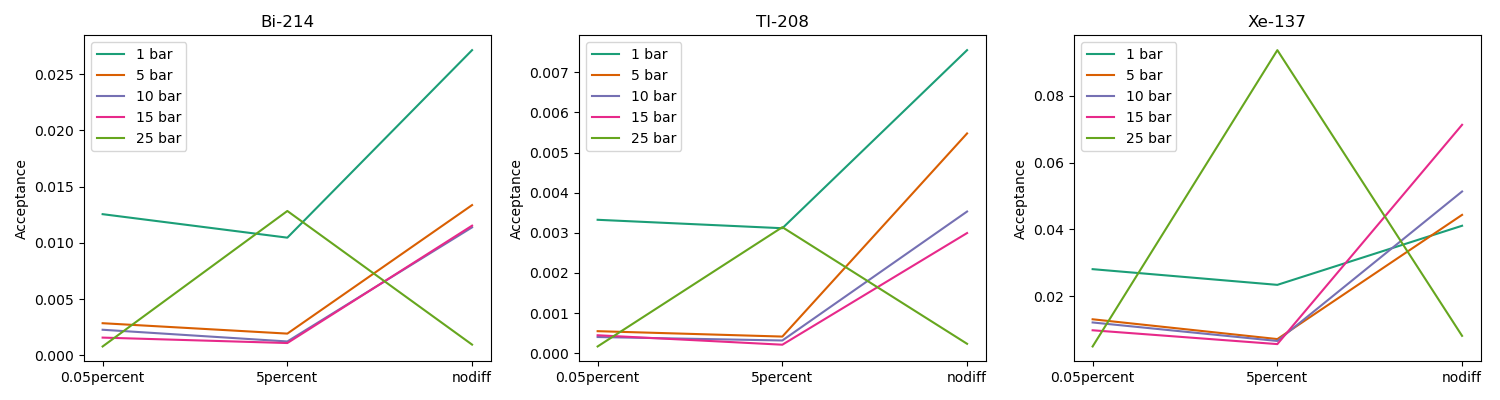

In [36]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

pressures = [1, 5, 10, 15, 25]
modes = ["Enriched", "Natural"]
# diff = "0.05percent"
diff = "5percent"
# diff = "nodiff"

diffusions = ["0.05percent", "5percent", "nodiff"]
mode = "enr"

Backgrounds = ["Bi_eff", "Tl_eff", "single_eff"]
Titles = ["Bi-214", "Tl-208", "Xe-137"]

for p in pressures:

    for index, b in enumerate(Backgrounds):
        
        temp_df = df[(df.Pressure == p) & (df.cut == mode)]
        temp_df = temp_df[ (temp_df.Diffusion == "nodiff") | (temp_df.Diffusion == "5percent") | (temp_df.Diffusion == "0.05percent")]
        df.sort_values(by="Diffusion", ascending=False)
        display(temp_df)
        temp_df = temp_df.reset_index(drop=True)
        # display(temp_df)
        ax[index].plot(diffusions, temp_df[b], label = f"{p} bar")
        ax[index].set_title(f"{Titles[index]}")
        ax[index].set_ylabel("Acceptance")

        ax[index].legend()

plt.tight_layout()

# plt.figure()

# for p in pressures:

#     temp_df = df[(df.Pressure == p) & (df.Diffusion == diff)]
#     temp_df = temp_df.reset_index(drop=True)
#     # display(temp_df)
#     plt.plot(modes, temp_df["nubb_eff"], label = f"{p} bar")
#     plt.title(f"0vbb")
#     plt.ylabel("Efficiency")

#     plt.legend()


,Pressure,Diffusion,cut,nubb_gen,nubb_cut,nubb_eff,Bkg_gen,Bkg_cut,Bkg_eff,Bi_gen,Bi_cut,Bi_eff,Tl_gen,Tl_cut,Tl_eff,single_gen,single_cut,single_eff
0,1,0.05percent,enr,192298,89587.46,0.247847,594825,15124,0.025426,199084,5405,0.027149,195184,1474,0.007552,200595,8245,0.041103
1,5,0.05percent,enr,195130,65416.32,0.248081,730594,13576,0.018582,309515,4135,0.013360,237926,1303,0.005476,183459,8138,0.044359
2,10,0.05percent,enr,194462,60025.64,0.248792,752667,14442,0.019188,358238,4076,0.011378,207018,731,0.003531,187620,9635,0.051354
3,15,0.05percent,enr,194426,58126.52,0.249636,786856,18528,0.023547,379236,4372,0.011528,219388,657,0.002995,189311,13499,0.071306
4,25,0.05percent,enr,188725,53542.72,0.248528,781714,23233,0.029721,389318,4997,0.012835,206300,648,0.003141,187823,17588,0.093641


,Pressure,Diffusion,cut,nubb_gen,nubb_cut,nubb_eff,Bkg_gen,Bkg_cut,Bkg_eff,Bi_gen,Bi_cut,Bi_eff,Tl_gen,Tl_cut,Tl_eff,single_gen,single_cut,single_eff
0,1,5percent,enr,192287,87878.58,0.243133,599388,8841,0.014750,203897,2559,0.012550,195183,649,0.003325,200347,5633,0.028116
1,5,5percent,enr,195171,64638.14,0.245079,731701,3421,0.004675,310281,883,0.002846,238263,131,0.000550,183465,2407,0.013120
2,10,5percent,enr,194831,59058.04,0.244318,754896,3182,0.004215,359595,814,0.002264,207799,84,0.000404,187711,2284,0.012168
3,15,5percent,enr,195042,56192.14,0.240566,790755,2558,0.003235,381578,597,0.001565,220849,99,0.000448,189422,1862,0.009830
4,25,5percent,enr,191502,54349.60,0.248615,794803,1956,0.002461,396482,373,0.000941,212357,50,0.000235,187784,1533,0.008164


,Pressure,Diffusion,cut,nubb_gen,nubb_cut,nubb_eff,Bkg_gen,Bkg_cut,Bkg_eff,Bi_gen,Bi_cut,Bi_eff,Tl_gen,Tl_cut,Tl_eff,single_gen,single_cut,single_eff
0,1,nodiff,enr,192298,88608.38,0.245139,599762,7440,0.012405,204022,2134,0.010460,195184,608,0.003115,200595,4698,0.023420
1,5,nodiff,enr,195171,65216.24,0.247270,731706,2015,0.002754,310356,596,0.001920,238261,99,0.000416,183397,1320,0.007198
2,10,nodiff,enr,194831,58609.50,0.242463,754376,1749,0.002318,359333,439,0.001222,207655,66,0.000318,187597,1244,0.006631
3,15,nodiff,enr,195246,57504.14,0.245925,791269,1539,0.001945,381848,413,0.001082,220980,47,0.000213,189534,1079,0.005693
4,25,nodiff,enr,193211,54356.16,0.246446,801114,1291,0.001612,400646,311,0.000776,213056,36,0.000169,189234,944,0.004989


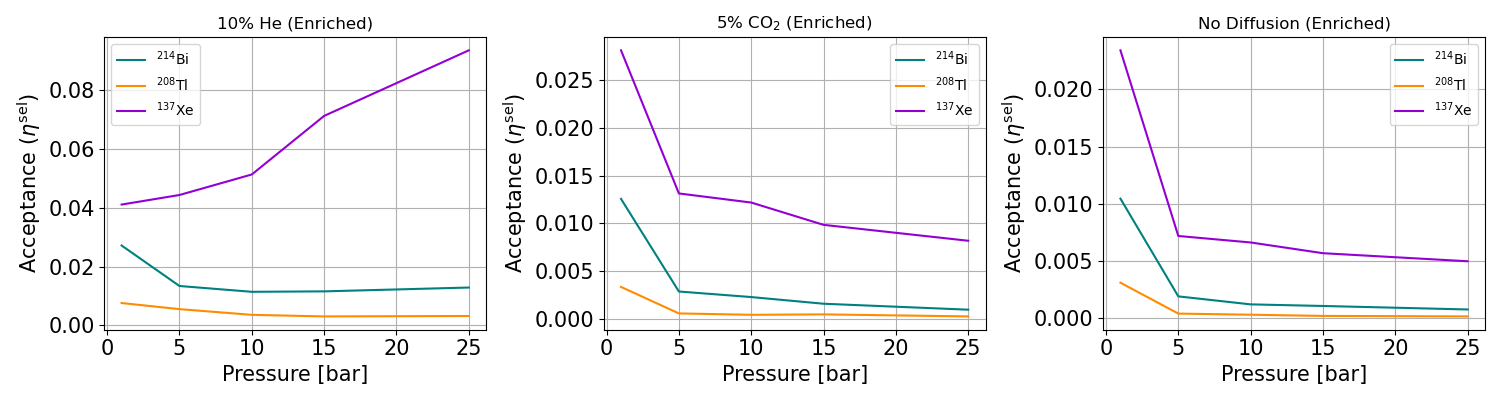

In [45]:
# make a plot of the selection acceptance factor. 

fig, ax = plt.subplots(1, 3, figsize=(15, 4))

pressures = [1, 5, 10, 15, 25]


diffusions = ["0.05percent", "5percent", "nodiff"]
mode = "enr"
# mode = "nat"

if mode == "enr":
    plot_title = "Enriched"
else:
    plot_title = "Natural"

Backgrounds = ["Bi_eff", "Tl_eff", "single_eff"]
Titles = ["10% He", "5% CO$_2$", "No Diffusion"]


for index, d in enumerate(diffusions):
    
    temp_df = df[(df.cut == mode) & (df.Diffusion == d)]
    temp_df= temp_df.sort_values(by="Pressure", ascending=True)
    temp_df = temp_df.reset_index(drop=True)
    display(temp_df)
    
    # ax[index].plot(temp_df.Pressure, temp_df["Bkg_eff"], label = f"Bkg Avg.", c = "k")
    ax[index].plot(temp_df.Pressure, temp_df["Bi_eff"], label = r"$^{214}$Bi", c = "Teal")
    ax[index].plot(temp_df.Pressure, temp_df["Tl_eff"], label = r"$^{208}$Tl", c = "DarkOrange")
    ax[index].plot(temp_df.Pressure, temp_df["single_eff"], label = r"$^{137}$Xe", c = "darkviolet")
    
    ax[index].set_title(f"{Titles[index]} ({plot_title})")

    ax[index].legend()
    ax[index].grid()
    ax[index].set_xlabel("Pressure [bar]", fontsize = 15)
    ax[index].set_ylabel(r"Acceptance ($\eta^{\mathrm{sel}}$)", fontsize = 15)
    ax[index].tick_params(axis='both', which='both', labelsize=15)
    # ax[index].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    # ax[index].ticklabel_format(style='sci', axis='y', scilimits=(0,0))


plt.tight_layout()


plt.savefig(f"../../../Projects/Atmospheric TPC/PaperDraft/SelectionPerformancePressure_{mode}.pdf")

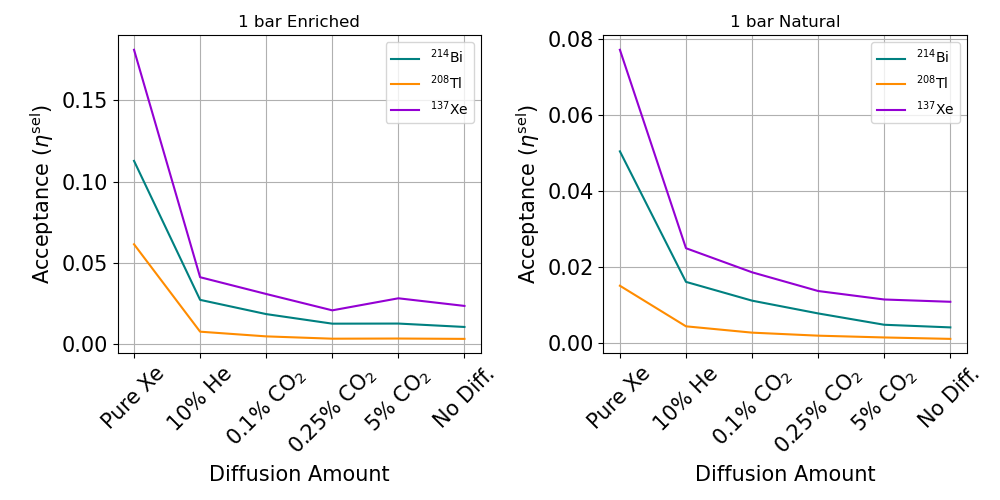

In [46]:
# make a plot of the selection acceptance factor. at 1 bar different diffusions

fig, ax = plt.subplots(1, 2,figsize=(10, 5))


diffusions = ["0.0percent", "0.05percent", "0.1percent", "0.25percent", "5percent", "nodiff"]

diffusion_labels = ["Pure Xe", "10% He", "0.1% CO$_2$", "0.25% CO$_2$", "5% CO$_2$", "No Diff."]

# # mode = "nat"

# Backgrounds = ["Bi_eff", "Tl_eff", "single_eff"]


# diff_vals 
mode = "enr"
temp_df = df[(df.cut == mode) & (df.Pressure == 1)]
temp_df["Diffusion"] = pd.Categorical(temp_df["Diffusion"], categories=diffusions, ordered=True)
temp_df= temp_df.sort_values("Diffusion").reset_index(drop=True)
# ax[0].plot(diffusion_labels, temp_df["Bkg_eff"], label = f"Bkg Avg.", c = "k")
ax[0].plot(diffusion_labels, temp_df["Bi_eff"], label = r"$^{214}$Bi", c = "Teal")
ax[0].plot(diffusion_labels, temp_df["Tl_eff"], label = r"$^{208}$Tl", c = "DarkOrange")
ax[0].plot(diffusion_labels, temp_df["single_eff"], label = r"$^{137}$Xe", c = "darkviolet")
ax[0].set_title(f"1 bar Enriched")
ax[0].legend()
ax[0].grid()
ax[0].set_xlabel("Diffusion Amount", fontsize = 15)
ax[0].set_ylabel(r"Acceptance ($\eta^{\mathrm{sel}}$)", fontsize = 15)
ax[0].tick_params(axis='both', which='both', labelsize=15)
ax[0].tick_params(axis='x', labelrotation=45)

mode = "nat"
temp_df = df[(df.cut == mode) & (df.Pressure == 1)]
temp_df["Diffusion"] = pd.Categorical(temp_df["Diffusion"], categories=diffusions, ordered=True)
temp_df= temp_df.sort_values("Diffusion").reset_index(drop=True)
# ax[1].plot(diffusion_labels, temp_df["Bkg_eff"], label = f"Bkg Avg.", c = "k")
ax[1].plot(diffusion_labels, temp_df["Bi_eff"], label = r"$^{214}$Bi", c = "Teal")
ax[1].plot(diffusion_labels, temp_df["Tl_eff"], label = r"$^{208}$Tl", c = "DarkOrange")
ax[1].plot(diffusion_labels, temp_df["single_eff"], label = r"$^{137}$Xe", c = "darkviolet")
ax[1].set_title(f"1 bar Natural")
ax[1].legend()
ax[1].grid()
ax[1].set_xlabel("Diffusion Amount", fontsize = 15)
ax[1].set_ylabel(r"Acceptance ($\eta^{\mathrm{sel}}$)", fontsize = 15)
ax[1].tick_params(axis='both', which='both', labelsize=15)
ax[1].tick_params(axis='x', labelrotation=45)



plt.tight_layout()


plt.savefig(f"../../../Projects/Atmospheric TPC/PaperDraft/SelectionAcceptanceDiffusion.pdf")